<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [7]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



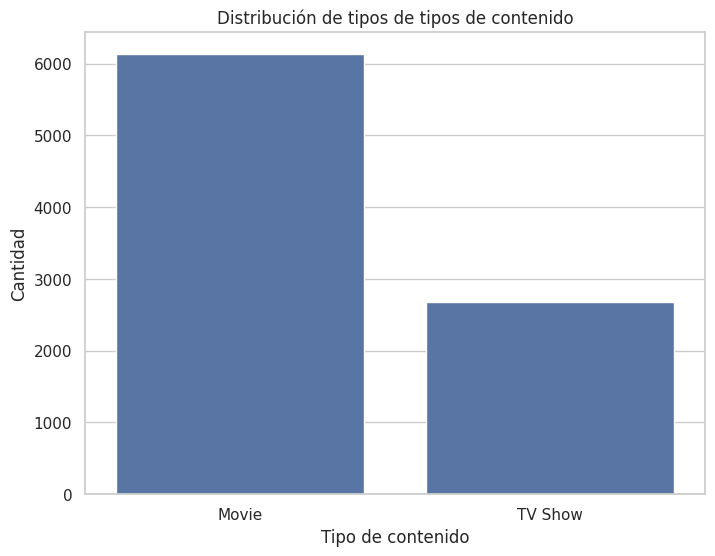

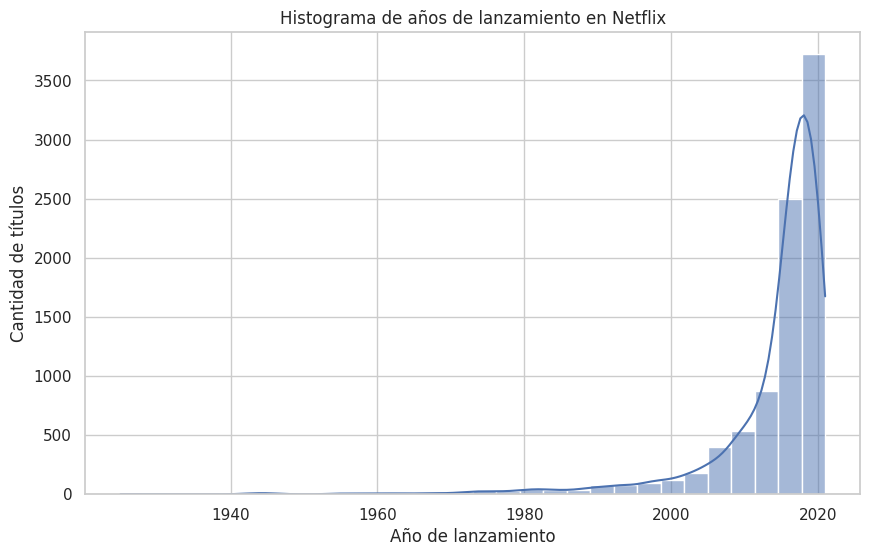

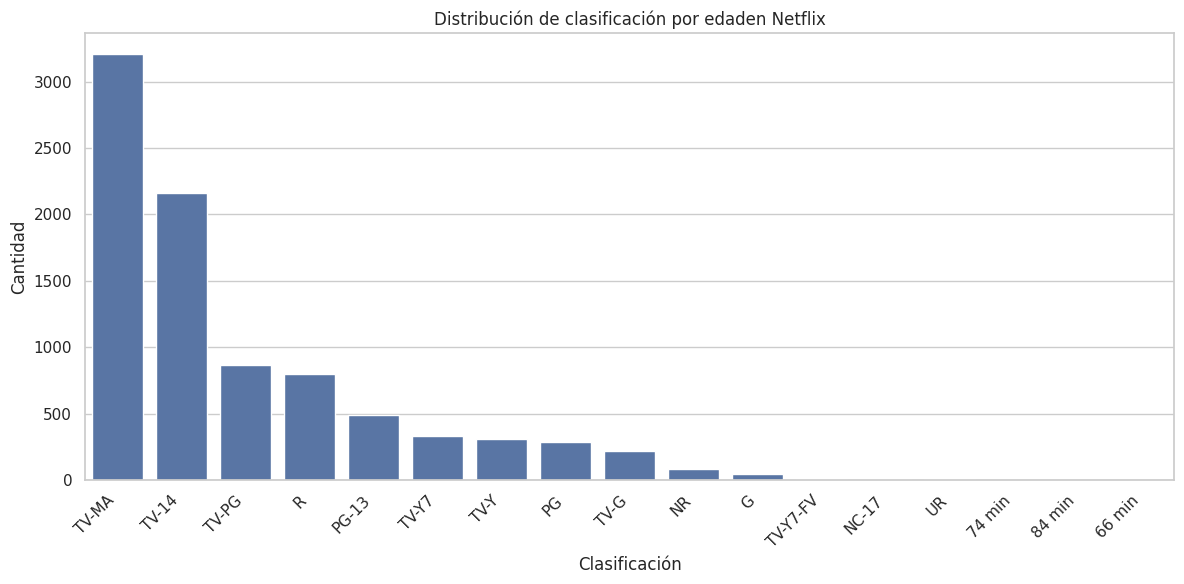

In [11]:
# 1. Distribución de tipos de contenido
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type')
plt.title('Distribución de tipos de tipos de contenido')
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad')
plt.show()
# 2. Histograma de años de lanzamiento
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=True)
plt.title('Histograma de años de lanzamiento en Netflix')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de títulos')
plt.show()
# 3. Proporción de clasificaciones por edad (rating)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Distribución de clasificación por edades Netflix')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




1.   Claramente, los usuarios prefieren consumir mucho mas peliculas que series. Esto implica que el Netflix se usa para reemplazar el cine y ademas que las peliculas, en si misma, tienen inicio-desarrollo-climax por lo que no es necesario gastar 10 horas para consumir la historia por completo. Se podria inferir, que la gente prefiere contenido corto.

2. Del grafico sabemos que hay mas contenido nuevo que antiguo. No se nota ningun patron en especifico para decadas, mas alla un aumento de contenido lanzado por año. Tipicamente, por la preferencia de la gente por Netflix a lo largo de tiempo.

3. La clasifación mas común es TV-MA, series de televisión para publico maduro, esto es un claro indicativo de que Netflix esta mas enfocada en contenido de adultos que de jovenes/niños.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


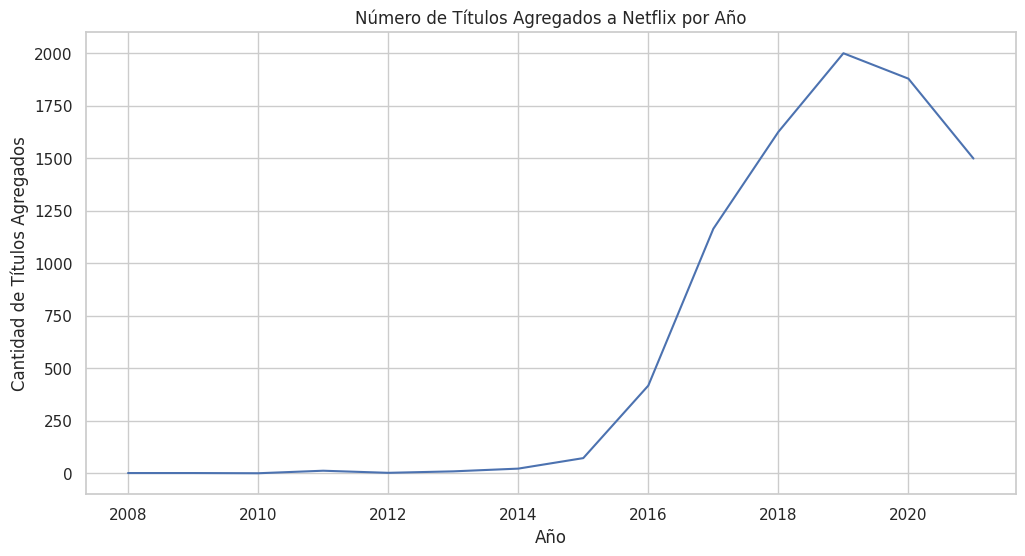

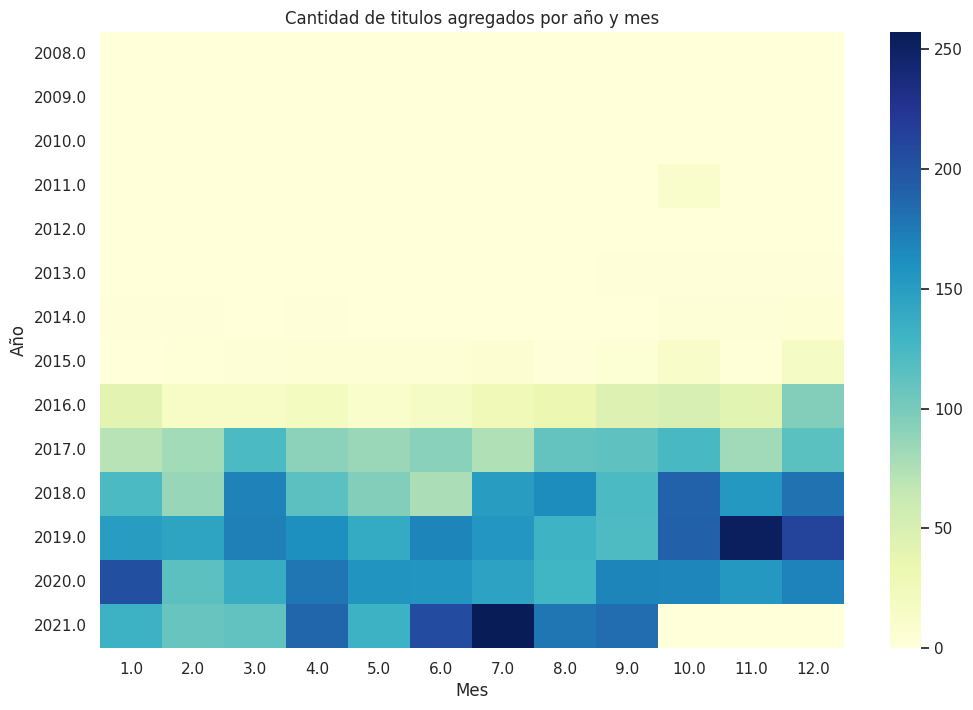

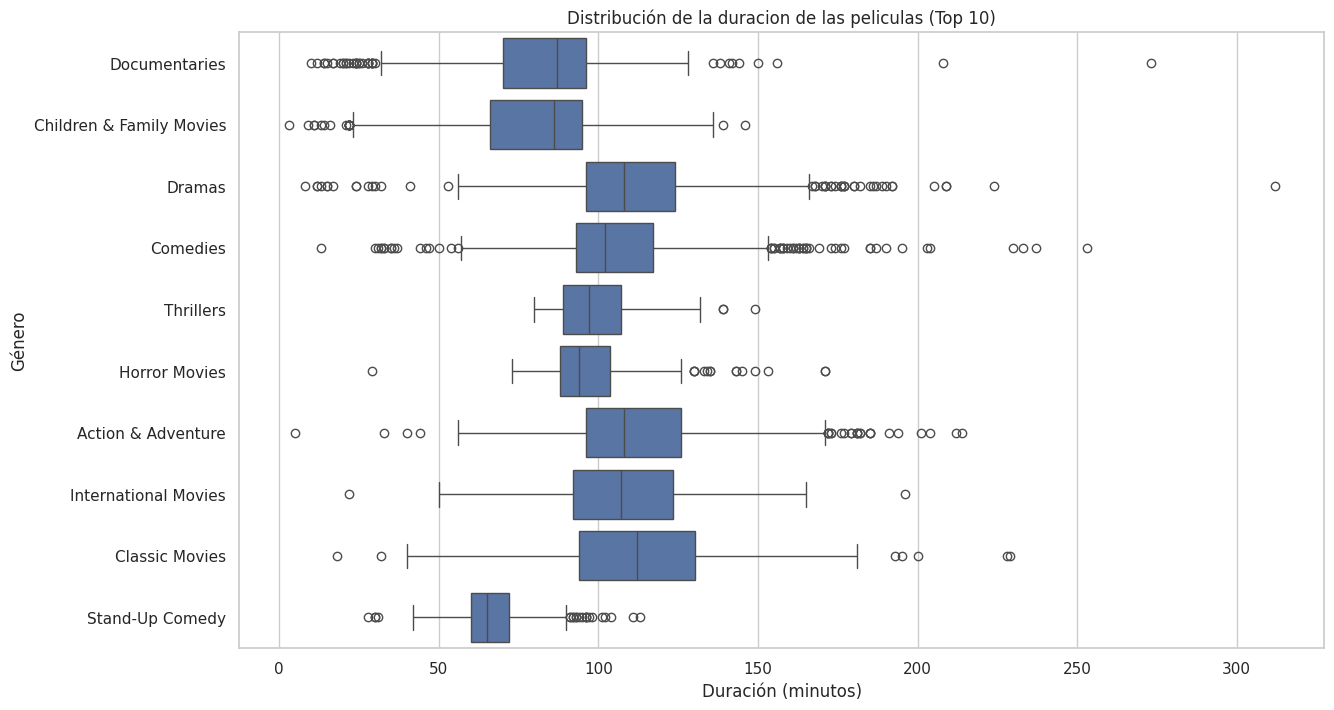

In [16]:
# 4. Número de títulos agregados por año
# Transformar date_added a formato fecha
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
#Se limpinan na
titles_by_year = df.dropna(subset=['year_added']).groupby('year_added').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=titles_by_year, x='year_added', y='count')
plt.title('Número de titulos agregados por años en Netflix')
plt.xlabel('Año')
plt.ylabel('Cantidad de Títulos Agregados')
plt.show()

# 5. Heatmap de lanzamientos por año y mes
df['month_added'] = df['date_added'].dt.month

heatmap_data = df.dropna(subset=['year_added', 'month_added']).groupby(['year_added', 'month_added']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Cantidad de titulos agregados por año y mes en Netflix')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()
# 6. Duración de películas por género
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)


movies_df['main_genre'] = movies_df['listed_in'].apply(lambda x: x.split(',')[0] if pd.notna(x) else None)

# Se escoge top 10 de generos para mejor visualizacion
top_genres = movies_df['main_genre'].value_counts().nlargest(10).index
movies_top_genres = movies_df[movies_df['main_genre'].isin(top_genres)]


plt.figure(figsize=(14, 8))
sns.boxplot(data=movies_top_genres, x='duration_minutes', y='main_genre')
plt.title('Distribución de la duracion de las peliculas (Top 10)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Género')
plt.show()




1.   Hubo un claro aumento en los titulos agregados en el año 2019. La expansion internacional de Netflix ocurrio el año 2015 y justamente, segun el grafico, es desde este año en hacia adelante que comienza a aumentar la cantidad de titulos agregados por años. Vemos una relación directa y positiva.
2.   Segun el mapa de color, los meses con mas titulos agregados son julio de 2021 y diciemnre de 2019. Notemos que los meses y años con mas titulos agregados son justamente las epocas coinciden con las vaciones de verano y las vacaciones de invierno en el hemisferio norte o tambien con las vacaciones que se suelen tomar en el trabajo.
3. Los generos que suelen durar mas son las peliculas clasicas junto a las peliculas internacionales. En cuanto la variabilidad, es evidente que existen muchos "outliers" y con ello el promedio de duracion de los generos de contenido no es una metrica fiable.





## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



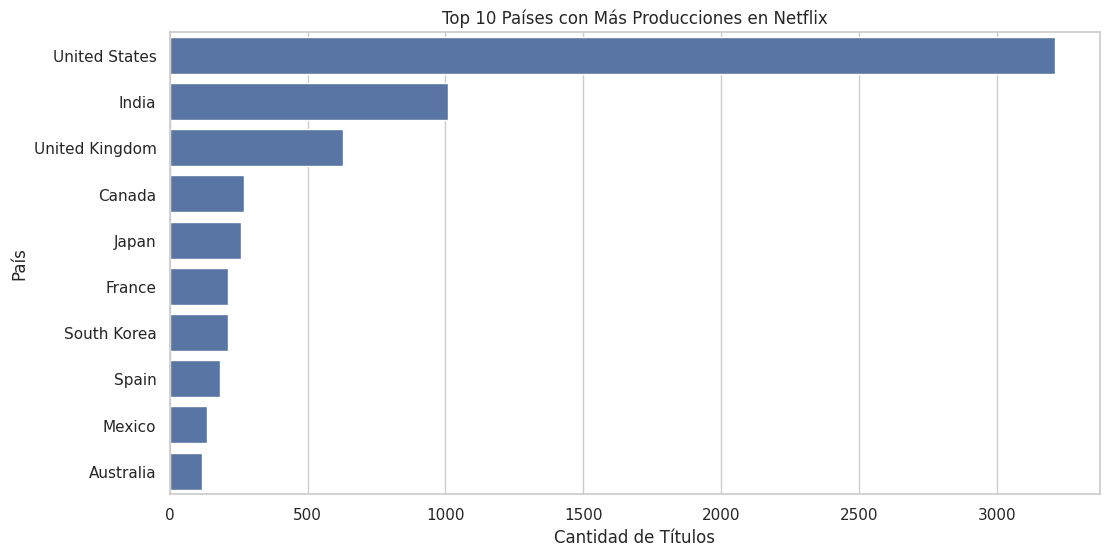

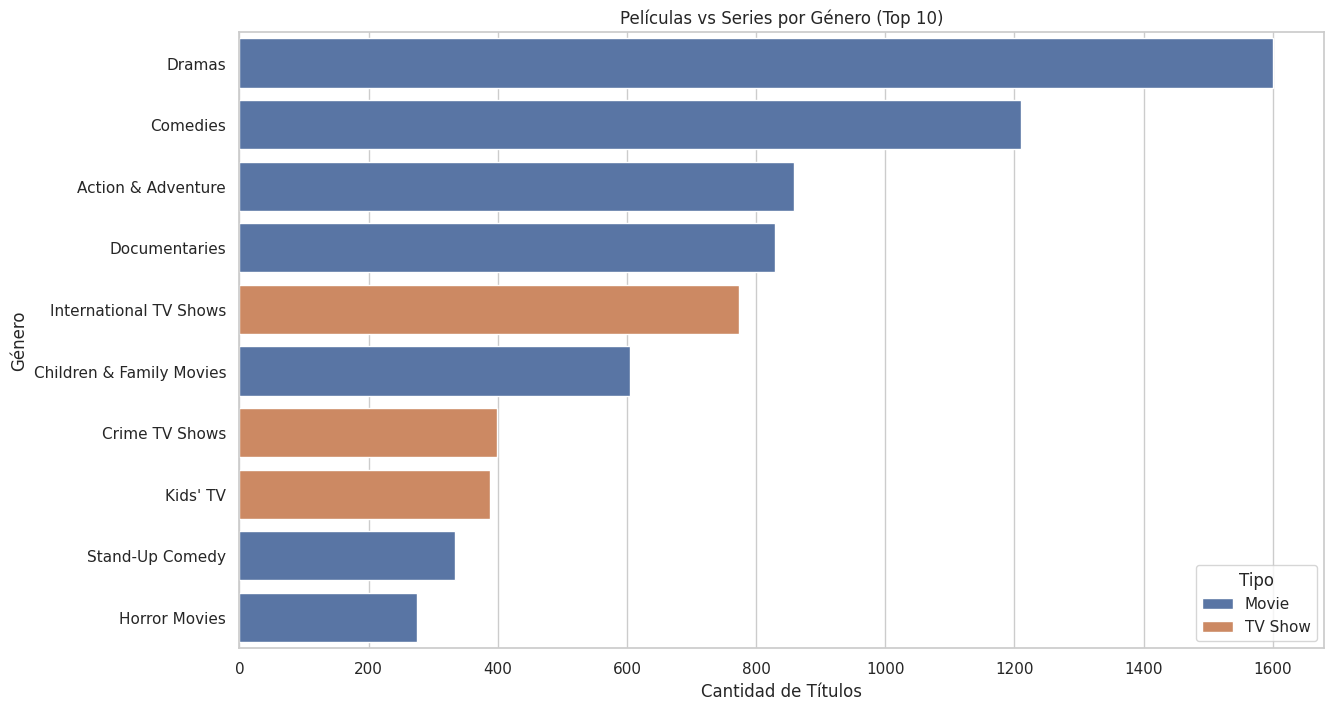

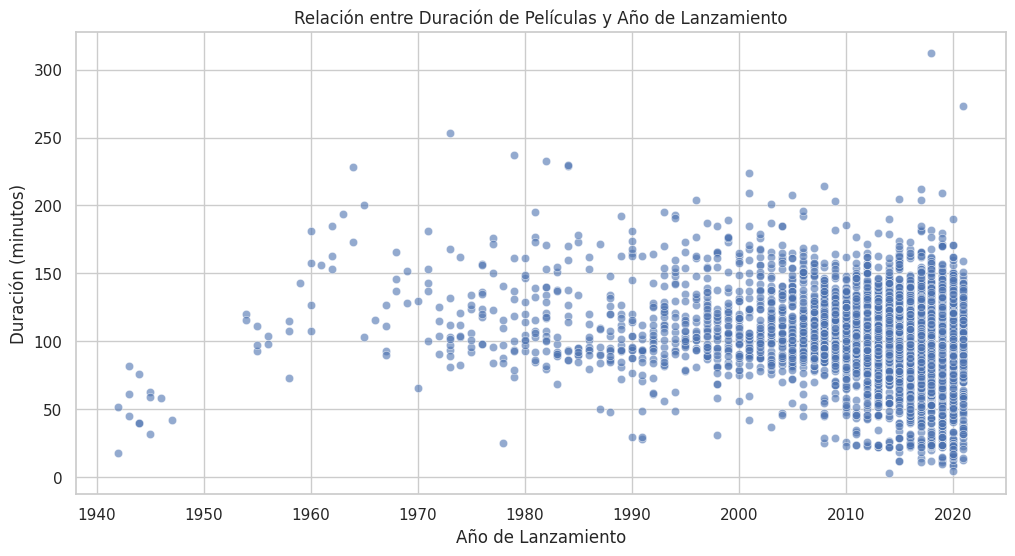

In [17]:
# 7. Top 10 países con más producciones
# Note que algunos titulos tienen multiples paises, por ello se considerara el primer
#pais enlistado
df['first_country'] = df['country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else None)

top_countries = df['first_country'].value_counts().nlargest(10).index
top_countries_df = df[df['first_country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=top_countries_df, y='first_country', order=top_countries)
plt.title('Top 10 Países con Más Producciones en Netflix')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('País')
plt.show()
# 8. Películas vs Series según género
# Lo que ocurre con los titulos y paises, ocurre con los generos
df['first_listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0] if pd.notna(x) else None)

# Se vuelve a tomar el top 10 para mejor visualización
top_genres_type = df['first_listed_in'].value_counts().nlargest(10).index
top_genres_type_df = df[df['first_listed_in'].isin(top_genres_type)]

plt.figure(figsize=(14, 8))
sns.countplot(data=top_genres_type_df, y='first_listed_in', hue='type', order=top_genres_type)
plt.title('Películas vs Series por Género (Top 10)')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Género')
plt.legend(title='Tipo')
plt.show()
# 9. Relación entre duración y año de lanzamiento

movies_df_filtered = df[(df['type'] == 'Movie') & (df['duration'].str.contains(' min', na=False))].copy()
movies_df_filtered['duration_minutes'] = movies_df_filtered['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_df_filtered, x='release_year', y='duration_minutes', alpha=0.6)
plt.title('Relación entre Duración de Películas y Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración (minutos)')
plt.show()



1.   Salta a la vista, del grafico, que el pais con mas producciones en Netflix es Estados Unidos. Lo cual, no es sorprendete, pues, Netflix inicio en tal pais.
2.   Del grafico se evidencia que existen mucho mas generos asociados a peliculas, lo cual, se condice con lo que hemos estando viendo. Al parecer, Netflix esta optando por esta modalidad de contenido.
3. Vemos un ligero cambio a la duracion de peliculas, es decir, que estas duren un poco. Ya que, en el grafico se puede ver que se acumulan desde los 150 minutos hacia abajo a medida que pasan los años. Tambien, note que outliers de 300 minutos y uno que otro de 250 minutos


## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

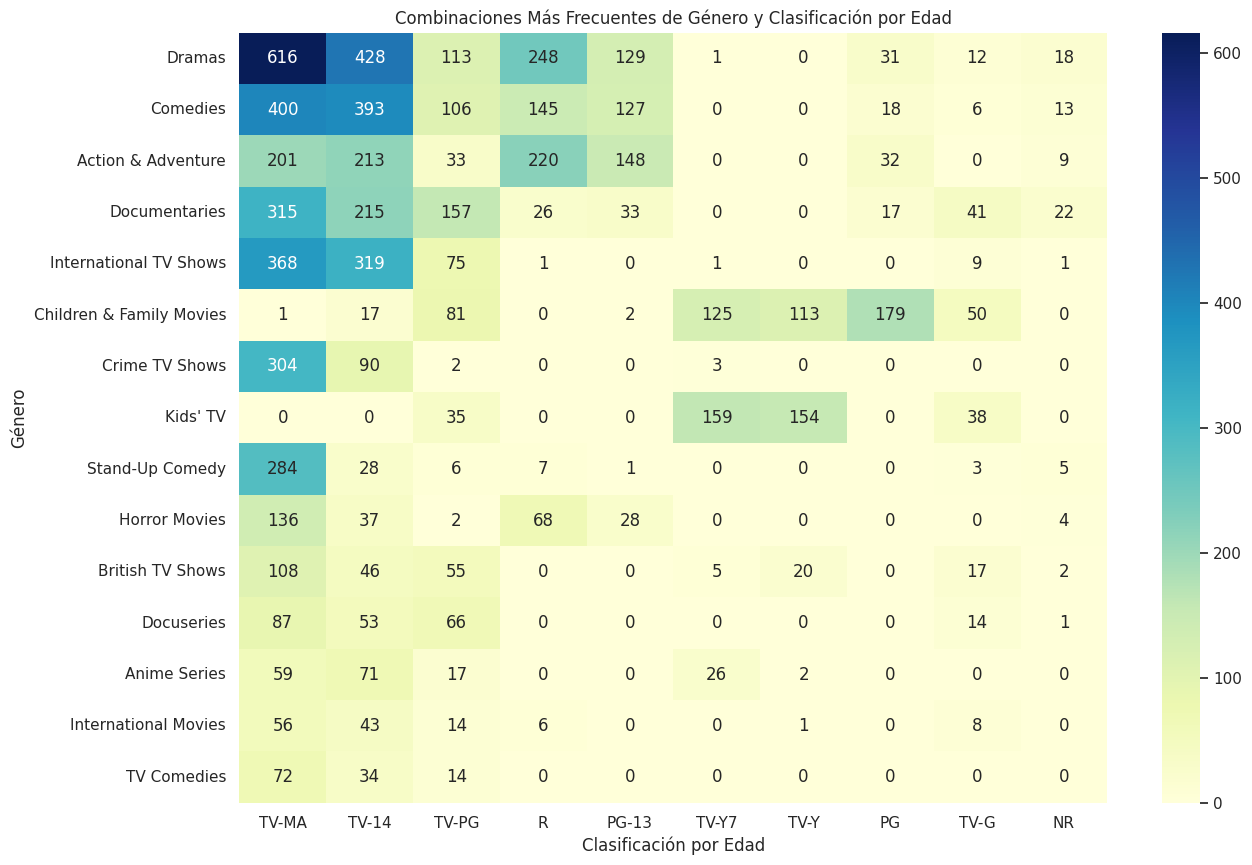

In [18]:
# Desafío Final: Combinaciones más frecuentes de género + rating

df['first_listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0] if pd.notna(x) else None)

genre_rating_counts = pd.crosstab(df['first_listed_in'], df['rating'])


top_genres = df['first_listed_in'].value_counts().nlargest(15).index
top_ratings = df['rating'].value_counts().nlargest(10).index

genre_rating_heatmap_data = genre_rating_counts.loc[top_genres, top_ratings]

plt.figure(figsize=(14, 10))
sns.heatmap(genre_rating_heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Combinaciones Más Frecuentes de Género y Clasificación por Edad')
plt.xlabel('Clasificación por Edad')
plt.ylabel('Género')
plt.show()

Los generos para adultos tienden a ser los de drama junto a las comedias. Un comportamiento identico sucede para TV-14, es decir, para los adolescentes